<a href="https://colab.research.google.com/github/krshrimali/FastAI-Deeplearning-For-Coders/blob/master/FASTAI_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

**Optimization method commonly used in NNs : SGD**

In [0]:
# Linear Regression Problem
n = 100
x = torch.ones(n, 2)

In [0]:
print("Shape of x: {}, Type: {}".format(x.shape, type(x)))

Shape of x: torch.Size([100, 2]), Type: <class 'torch.Tensor'>


In [0]:
print(x[:5])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [0]:
x[:, 0].uniform_(-1., 1) # it's inplace

tensor([-0.7246, -0.6373, -0.3413,  0.5526, -0.2630,  0.9529,  0.5428, -0.7696,
        -0.3096,  0.5639,  0.1766, -0.3254,  0.6054,  0.6329,  0.9896,  0.0104,
         0.8568, -0.6651, -0.2029,  0.1229, -0.6752, -0.0061, -0.6732,  0.2752,
         0.9729, -0.7633, -0.4974,  0.0880,  0.3271, -0.7444,  0.2102, -0.6416,
         0.2358, -0.5351,  0.9136, -0.0229, -0.4078,  0.4429, -0.0775, -0.6269,
        -0.8083,  0.8955, -0.8582, -0.9439,  0.3828,  0.8200,  0.9015, -0.6335,
         0.5986, -0.6913, -0.3556, -0.7053,  0.2023,  0.5322,  0.5647, -0.0259,
         0.8583,  0.4856, -0.1763,  0.7095,  0.2784, -0.4323, -0.9979, -0.7891,
         0.0465,  0.2832,  0.2775,  0.5406, -0.8764,  0.1657, -0.2441,  0.5571,
         0.4383,  0.2310, -0.1184, -0.0096, -0.6119,  0.8885, -0.3747,  0.3583,
        -0.2949, -0.4072,  0.5768, -0.2815,  0.2485,  0.2755, -0.1908, -0.1721,
        -0.5063,  0.7520, -0.4047, -0.5204,  0.9518,  0.2617,  0.0287,  0.9834,
        -0.6464,  0.3241,  0.5596, -0.91

In [0]:
x[:5, 0]

tensor([-0.7246, -0.6373, -0.3413,  0.5526, -0.2630])

In [0]:
m = tensor(3., 2); m

tensor([3., 2.])

In [0]:
y = x@m + torch.randn(n) # y = mx + c type

In [0]:
y.shape

torch.Size([100])

Text(0.5, 1.0, 'Linear Regression: Training Set')

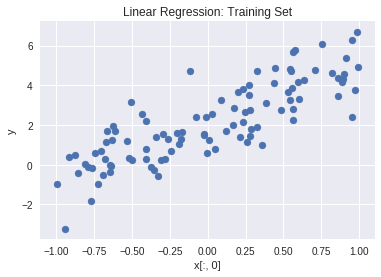

In [0]:
plt.scatter(x[:, 0], y)
plt.xlabel('x[:, 0]')
plt.ylabel('y')
plt.title("Linear Regression: Training Set")

In [0]:
def mse(y_hat, y): 
  # return mse error
  return ((y_hat - y)**2).mean()

In [0]:
# let's say that a = [-1. 1]
m = tensor(-1., 1)
y_hat = x@m

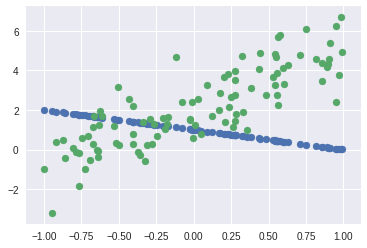

In [0]:
plt.scatter(x[:, 0], y_hat)
plt.scatter(x[:, 0], y)

In [0]:
# Gradient Descent
m = nn.Parameter(m)
m = torch.autograd.Variable(m, requires_grad=True)
m

tensor([-1.,  1.], requires_grad=True)

In [0]:
def update(t, lr):
  y_hat = x@m
  y = x@m + torch.randn(n) # y = mx + c type
  print(m)
  loss = mse(y, y_hat)
  if (t % 10 == 0): print(loss)
  loss = torch.autograd.Variable(loss, requires_grad=True)
  loss.backward()
  with torch.no_grad():
    m.sub_(lr * m.retain_grad())
    m.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100):
  update(t, lr)

tensor([-1.,  1.], requires_grad=True)
tensor(1.0579, grad_fn=<MeanBackward1>)


TypeError: ignored